In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import scipy.optimize as opt
import scipy.constants as const
import os
import lal as lal
from scipy.signal import spectrogram
import gw_detections_functions as gw
import pandas as pd
title_size = 16
axis_size = 12
df = pd.DataFrame

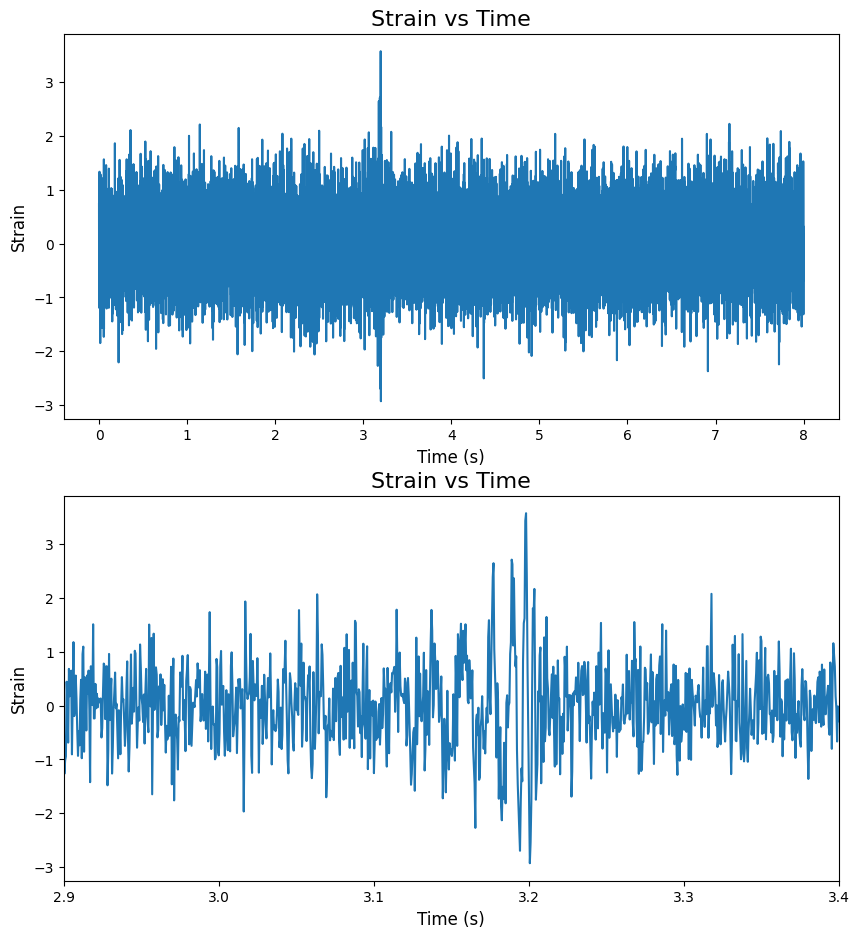

In [ ]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]

plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)

plt.subplot(2,1,2)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.xlim(2.9,3.4)
plt.show()

The siganl shows a peak in the strain likely as the black holes collide releasing a lot of energy in a short amount of time.

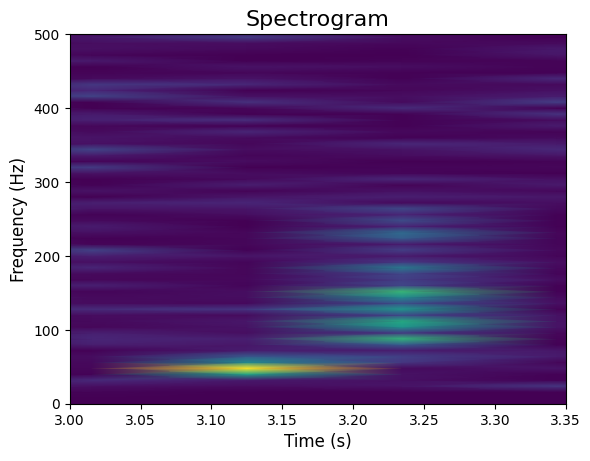

In [ ]:
spec_f, spec_t, spec = sp.signal.spectrogram(strain, 2048)
plt.pcolormesh(spec_t, spec_f, spec, shading='gouraud')
plt.ylabel('Frequency (Hz)', fontsize=axis_size)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3,3.35)
plt.ylim(0,500)
plt.title('Spectrogram', fontsize=title_size)
plt.show()


reasonable mass of a black hole in merger 7 - 37 solar masses

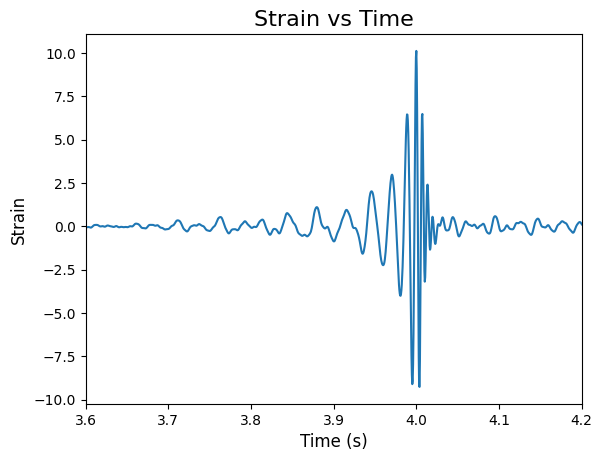

In [ ]:
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(70,36,2048,8,inv_psd,400)

plt.figure()
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3.6,4.2)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()


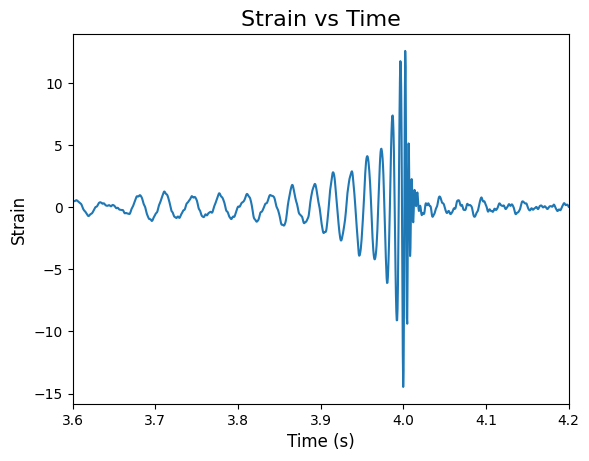

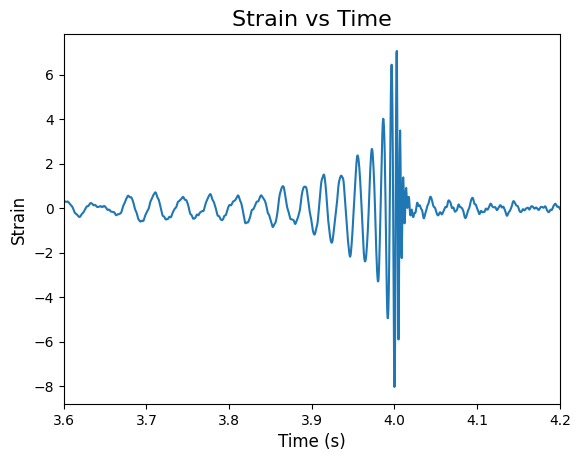

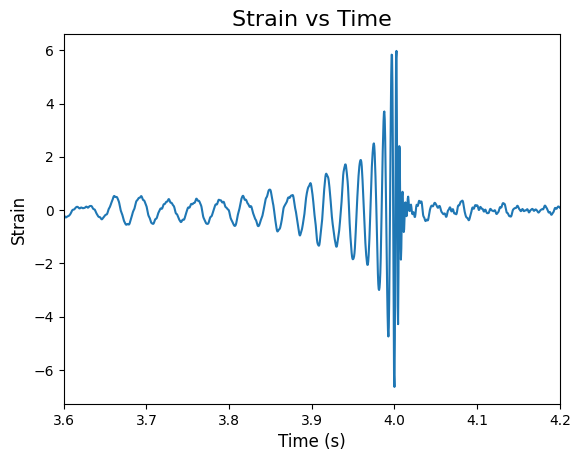

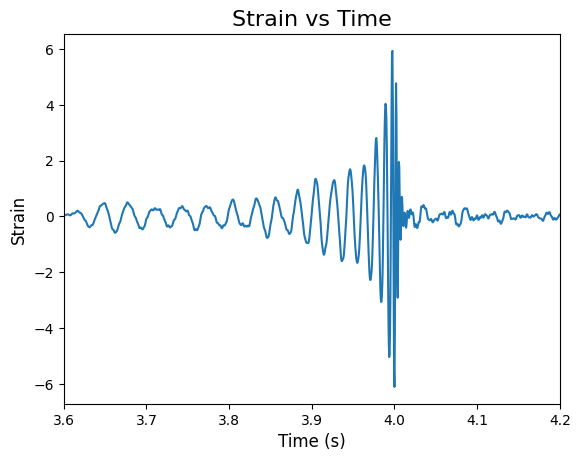

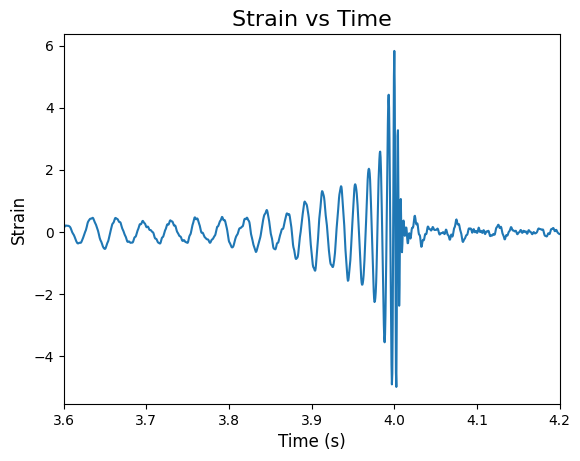

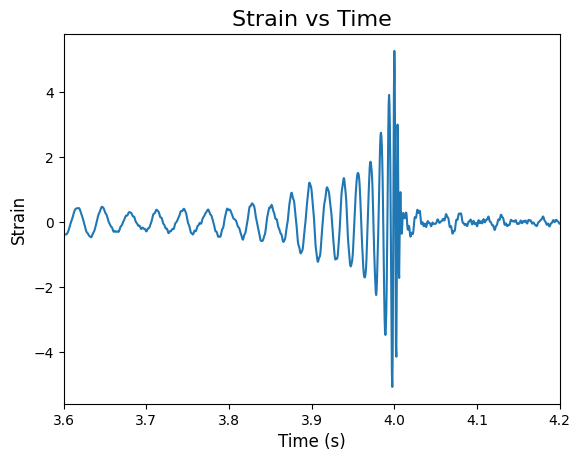

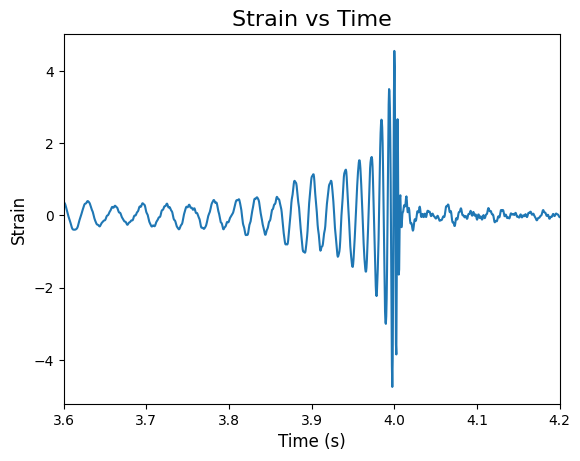

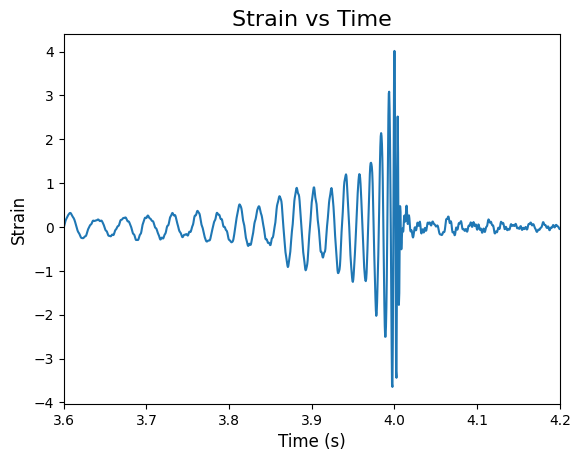

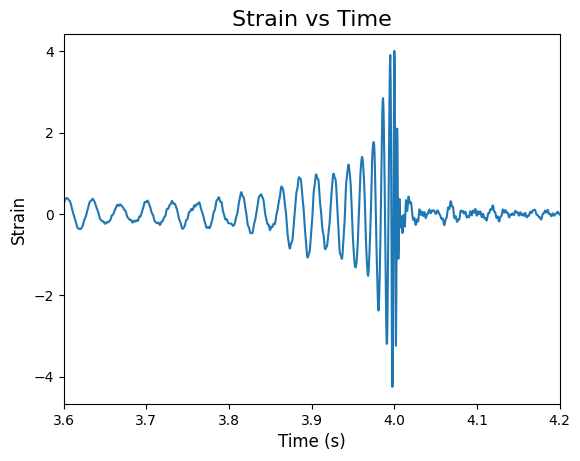

In [ ]:
mass_one = [37,38,36,35,34,33,32,31,25]
mass_two = [24,23,22,21,20,19,18,17,24]
mass_three = np.array(mass_one) - 1
distance = [400,500,350,450,430,510,390,200,420]
distance = np.sort(np.array(distance))
for i in range(len(mass_one)):
        t, template = gw.make_template(mass_one[i],mass_two[i],2048,8,inv_psd,distance[i])
        plt.figure()
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(3.6,4.2)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()



# Task 2

As distance increases the amplitude of the wave decreases.
not much changes for masses that are simlar or different

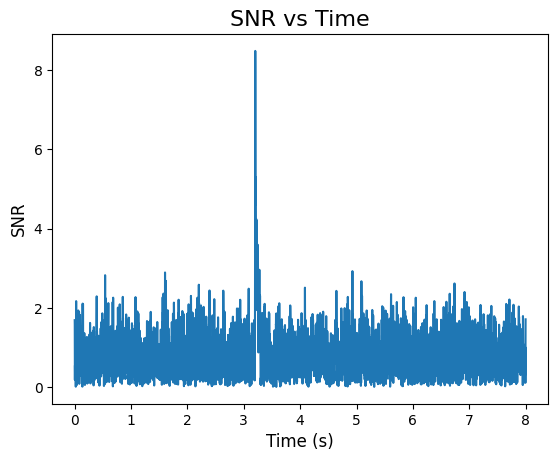

8.482283713317145
(array([6561]),)
[8.48228371] [3.20361328]


In [ ]:
snr_ts = gw.get_snr(strain, template, 2048)
plt.figure()
plt.plot(time,snr_ts)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('SNR', fontsize=axis_size)
plt.title('SNR vs Time', fontsize=title_size)

plt.show()
print(np.max(snr_ts))
print(np.where(np.max(snr_ts) == snr_ts))
print(snr_ts[np.where(np.max(snr_ts) == snr_ts)],time[np.where(np.max(snr_ts) == snr_ts)])

min_time = time[np.where(np.max(snr_ts) == snr_ts)]-1
max_time = time[np.where(np.max(snr_ts) == snr_ts)]+1


### Part a

13.82517442057536 37.02040816326531 35.42857142857143


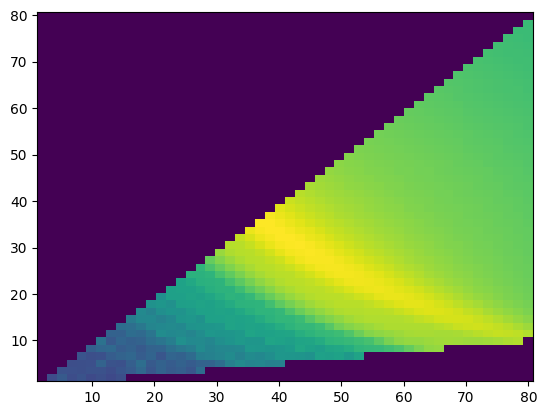

13.82860317370107 36.42857142857143 35.714285714285715


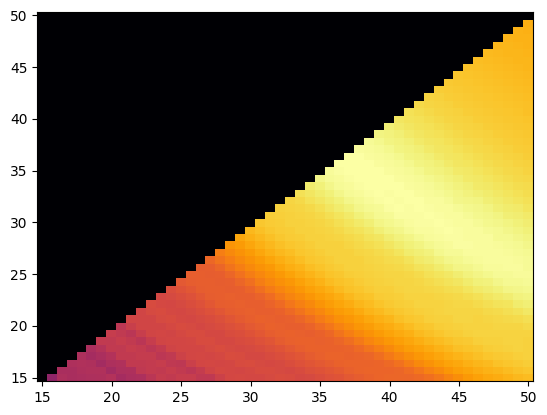

In [ ]:
masses = np.linspace(2,80,50)
currentmax = 0
highest_snr = [[0 for x in range(13)] for y in range(13)]
mass1 = [] 
mass2 = [] 
allsnr = []

for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr.append(0)
print(currentmax, M1, M2)

reshaped = (np.reshape(allsnr, (50,50)).T)
plt.figure()
plt.pcolor(masses, masses, reshaped)
plt.show()

allsnr2 = []
currentmax = 0
masses2 = np.linspace(15,50,50)
maxsnr = []
for m1 in masses2:
    for m2 in masses2:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr2.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr2.append(0)
print(currentmax, M1, M2)



reshaped = (np.reshape(allsnr2, (50,50)).T)
plt.figure()
plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
plt.show()

Best fit mass pair for snr result is 36,35 solar masses

### Part b

The best fit parameters for distance, time, and phase are 1136.8748496314718, 3.197952292825166, and 4.239515522471979e-18 respectively.


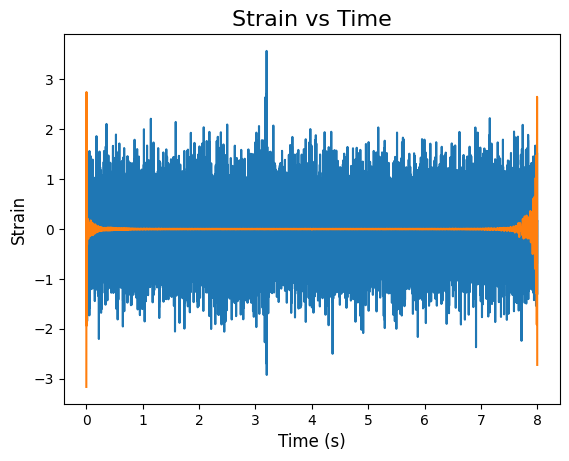

In [ ]:
mass1 = M1
mass2 = M2
def make_signal(t,d,tc,phic):
    _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    return signal
t = 8
distances = np.array(np.linspace(100,10000,10000))
tc_min = min_time
tc_max = max_time
phic_min = 0
phic_max = 2*np.pi
d_min = 100
d_max = 2000
#p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]


ht_err = np.array(np.ones(strain.size))
b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
popt, pcov = curve_fit(make_signal,time ,strain, p0 = [890,time[(np.where(np.max(snr_ts) == snr_ts),)],5],bounds = b, sigma=ht_err, absolute_sigma=True)

t, template = gw.make_template(mass1,mass2,2048,8,inv_psd,popt[0],popt[1],popt[2])

print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
plt.figure()
plt.plot(time, strain)
plt.plot(time, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
#plt.xlim(2.9,3.4)
plt.show()

------------------------------------------------------------
GW150914_strain.txt


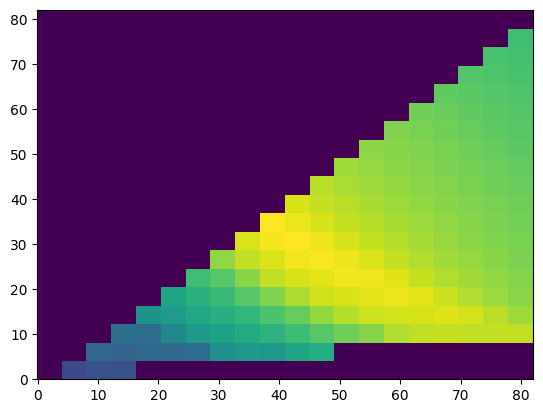

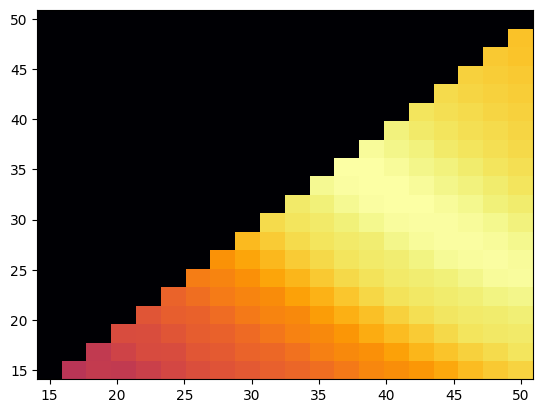

The best fit masses for GW170823_inv_psd.txt are 37.10526315789474 and 35.26315789473684 respectively.
[[3.19091797]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.999999999999, 3.1920834233058213, and 2.04529730271242 respectively.
13.515295738365209 37.10526315789474 35.26315789473684
------------------------------------------------------------
GW170823_strain.txt


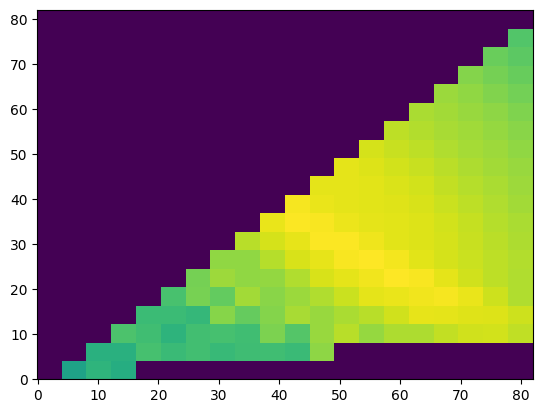

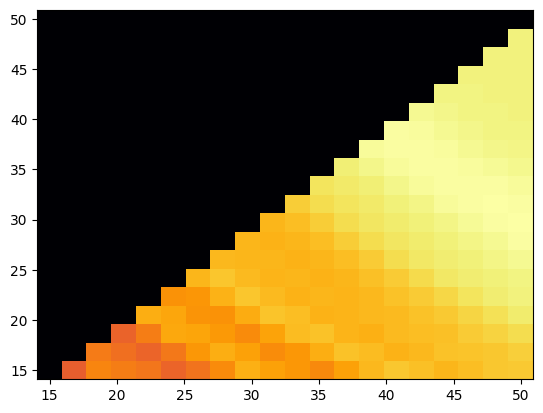

The best fit masses for GW170823_inv_psd.txt are 50.0 and 29.736842105263158 respectively.
[[4.45361328]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.9999999977135, 4.4513284725549385, and 6.283184883031562 respectively.
4.75706281598961 50.0 29.736842105263158
------------------------------------------------------------
GW170814_strain.txt


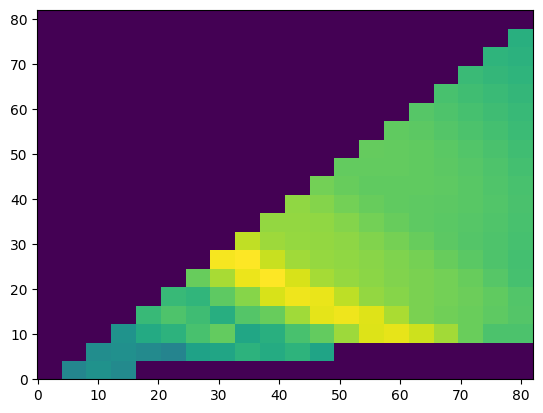

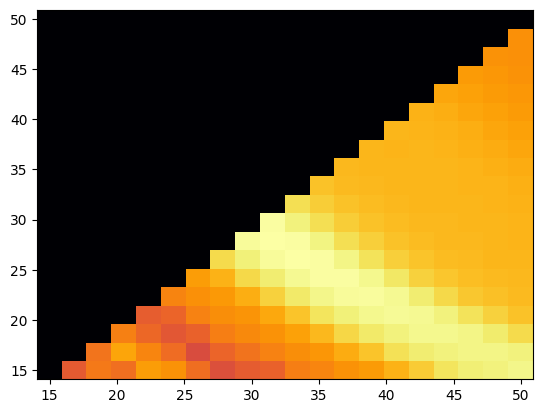

The best fit masses for GW170823_inv_psd.txt are 31.57894736842105 and 27.894736842105264 respectively.
[[3.32666016]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.999999999999, 3.3283673452487763, and 3.8255027201164005 respectively.
6.011041088781024 31.57894736842105 27.894736842105264
------------------------------------------------------------
GW170104_strain.txt


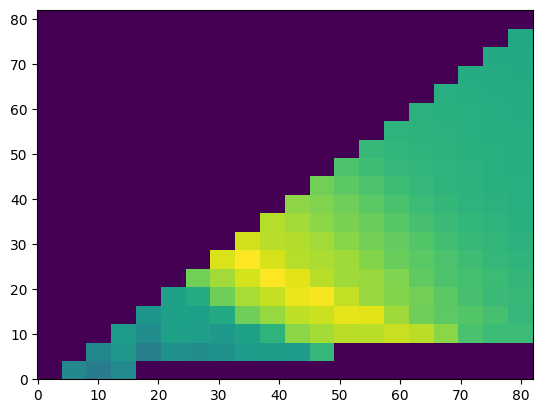

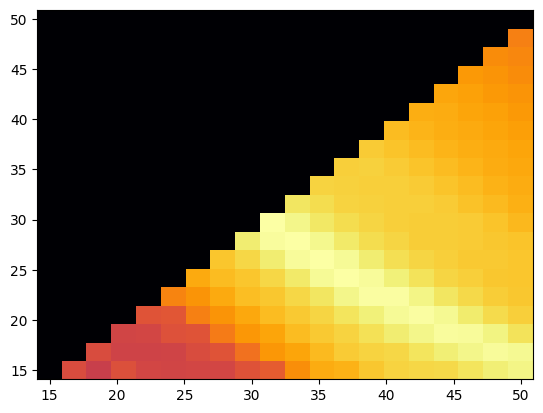

The best fit masses for GW170823_inv_psd.txt are 35.26315789473684 and 26.05263157894737 respectively.
[[1.96533203]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.999999999999, 1.9681790435546678, and 3.777976776760288 respectively.
6.462220737230236 35.26315789473684 26.05263157894737
------------------------------------------------------------
GW151226_strain.txt


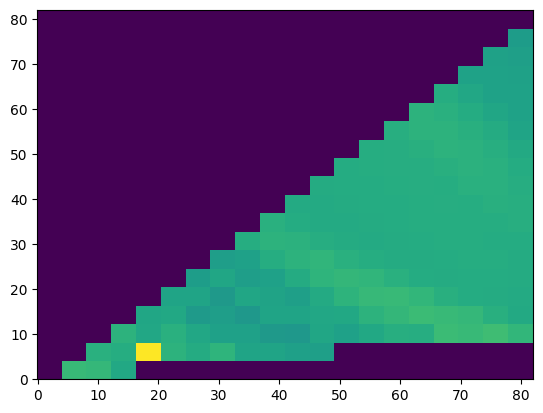

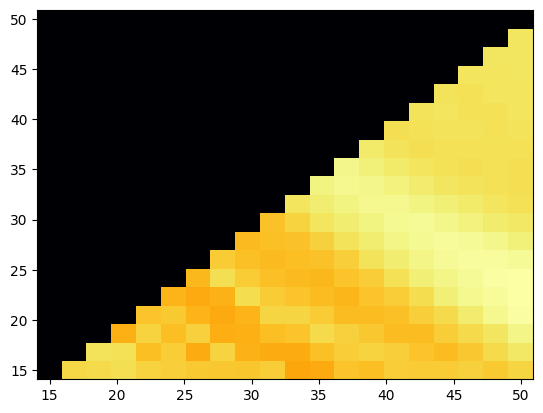

The best fit masses for GW170823_inv_psd.txt are 50.0 and 24.210526315789473 respectively.
[[5.97363281]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4448.4924813014, 5.979277765135801, and 0.7019928913673674 respectively.
3.159041222580963 50.0 24.210526315789473
------------------------------------------------------------
GW151012_strain.txt


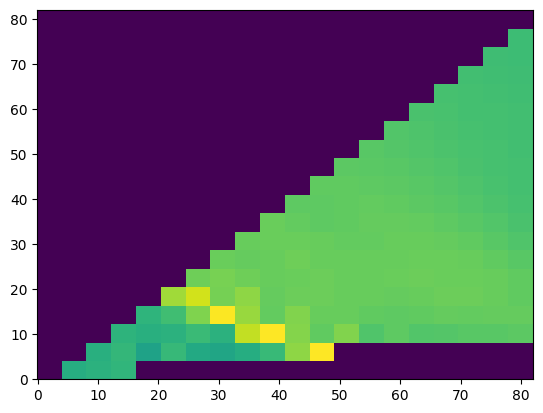

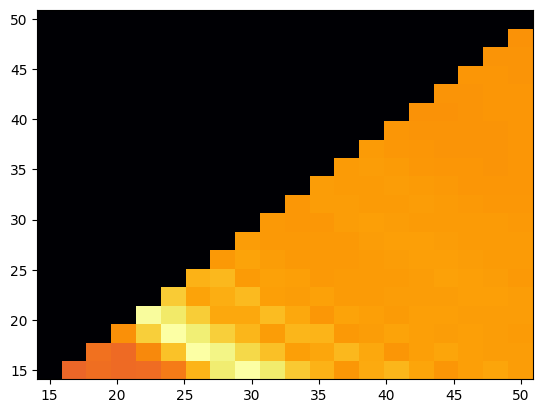

The best fit masses for GW170823_inv_psd.txt are 29.736842105263158 and 15.0 respectively.
[[2.69384766]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.999999999999, 2.6950244494427844, and 3.6171014265490897 respectively.
4.731876155000764 29.736842105263158 15.0
------------------------------------------------------------
GW170817_strain.txt
------------------------------------------------------------
GW170729_strain.txt


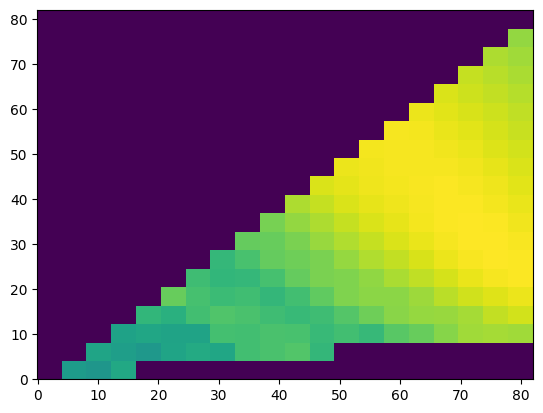

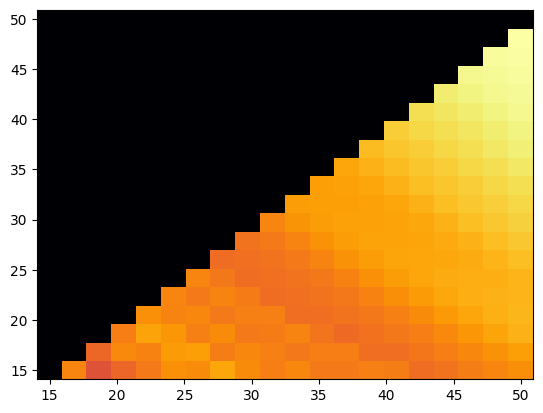

The best fit masses for GW170823_inv_psd.txt are 50.0 and 48.1578947368421 respectively.
[[3.54003906]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 3875.432304477035, 3.5400559763422805, and 2.682156908076068 respectively.
5.18550779748885 50.0 48.1578947368421
------------------------------------------------------------
.ipynb_checkpoints


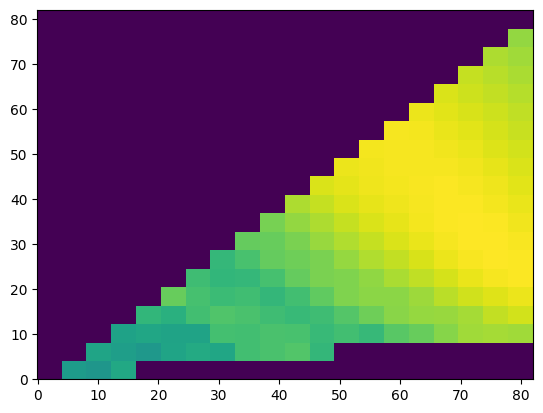

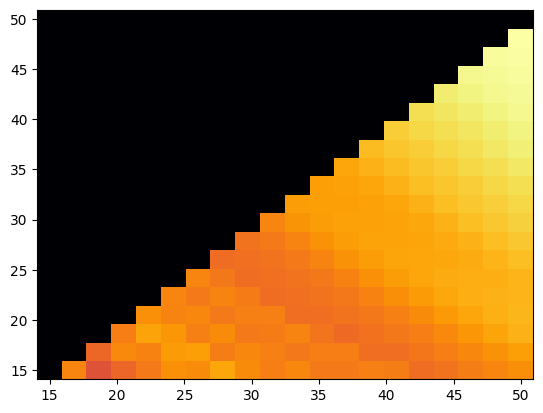

The best fit masses for GW170823_inv_psd.txt are 50.0 and 48.1578947368421 respectively.
[[3.54003906]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 3875.432304477035, 3.5400559763422805, and 2.682156908076068 respectively.
5.18550779748885 50.0 48.1578947368421
------------------------------------------------------------
GW170809_strain.txt


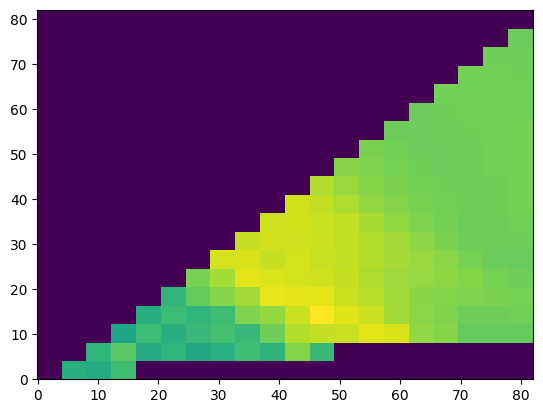

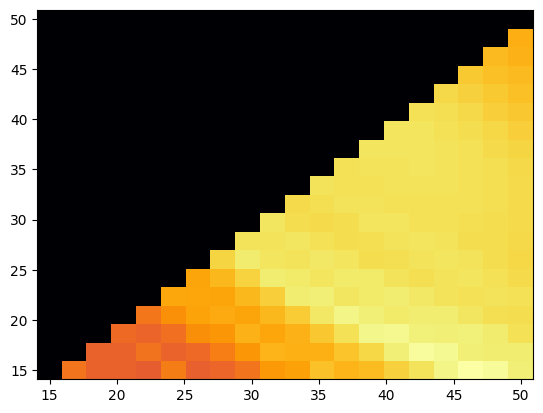

The best fit masses for GW170823_inv_psd.txt are 46.315789473684205 and 15.0 respectively.
[[2.63183594]]
The best fit parameters for data set GW170823_inv_psd.txt for distance, time, and phase are 4499.999999999999, 2.633178093625321, and 6.283185228558428 respectively.
5.042522632380923 46.315789473684205 15.0
------------------------------------------------------------
GW170818_strain.txt


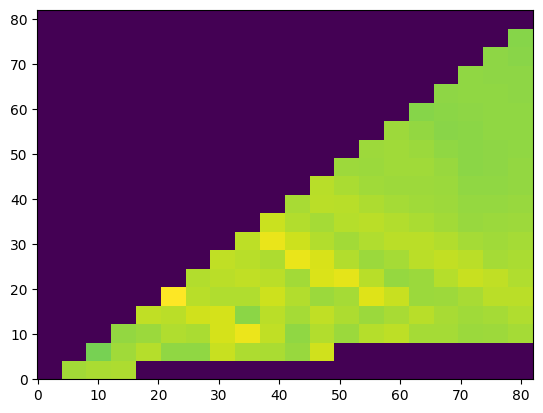

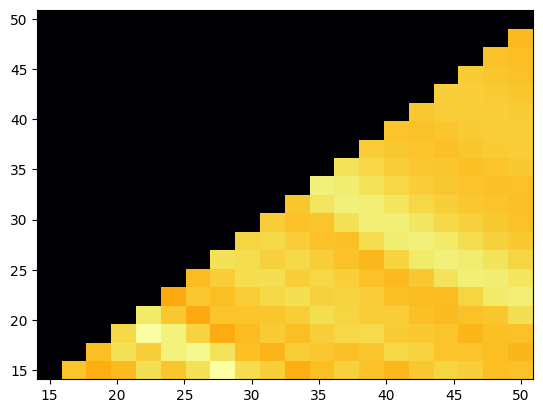

The best fit masses for GW170823_inv_psd.txt are 27.894736842105264 and 15.0 respectively.
[[3.75146484]]


ValueError: `x0` is infeasible.

In [ ]:
path = 'strain_data/'
files = os.listdir(path)

for file in files:
    filename = path+file
    print('------------------------------------------------------------')
    print(file)
    if file.startswith('GW170817'):
        pass
    else:
        if file.endswith('strain.txt'):
            data = np.loadtxt(filename)
            time = data[:,0]
            strain = data[:,1]
        for file in os.listdir('inv_psd/'):
            if file.endswith('inv_psd.txt'):
                inv_psd_data = np.loadtxt('inv_psd/'+file)
                inv_psd2 = inv_psd_data[:,1]
            
        t, template = gw.make_template(37,36,2048,8,inv_psd2,400)
        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-1
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.5

        masses = np.linspace(2,80,20)
        currentmax = 0
        highest_snr = [[0 for x in range(13)] for y in range(13)]
        mass1 = [] 
        mass2 = [] 
        allsnr = []

        for m1 in masses:
            for m2 in masses:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2,400)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2

                else:
                    allsnr.append(0)
        reshaped = (np.reshape(allsnr, (20,20)).T)
        plt.figure()
        plt.pcolor(masses, masses, reshaped)
        plt.show()

        allsnr2 = []
        currentmax = 0
        masses2 = np.linspace(15,50,20)
        maxsnr = []
        for m1 in masses2:
            for m2 in masses2:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2,400)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr2.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2
                else:
                    allsnr2.append(0)

        reshaped = (np.reshape(allsnr2, (20,20)).T)
        plt.figure()
        plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
        plt.show()
        
        def make_signal(t,d,tc,phic):
            _,signal = gw.make_template(M1,M2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
            return signal
        t = 8
        distances = np.array(np.linspace(100,10000,10000))
        tc_min = min_time
        tc_max = max_time
        phic_min = 0
        phic_max = 2*np.pi
        d_min = 100
        d_max = 4500
        print(f'The best fit masses for {file} are {M1} and {M2} respectively.')
        print(time[(np.where(np.max(snr_ts) == snr_ts),)])
        ht_err = np.array(np.ones(strain.size))
        b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
        popt, pcov = curve_fit(make_signal,time ,strain, p0 = [890,time[(np.where(np.max(snr_ts) == snr_ts),)],5],bounds = b, sigma=ht_err, absolute_sigma=True)
        print(f'The best fit parameters for data set {file} for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
        print(currentmax, M1, M2)


In [ ]:
      
    # data = np.loadtxt('data_files/GW150914_strain.txt')
    # time = data[:,0]
    # strain = data[:,1]


    # inv_psd = np.loadtxt('data_files/GW150914_inv_psd.txt',usecols=(1,))
    # t, template = gw.make_template(37,36,2048,8,inv_psd,400)



    # snr_ts = gw.get_snr(strain, template, 2048)
    # min_time = time[np.where(np.max(snr_ts) == snr_ts)]-1
    # max_time = time[np.where(np.max(snr_ts) == snr_ts)]+1



    # masses = np.linspace(2,80,50)
    # currentmax = 0
    # highest_snr = [[0 for x in range(13)] for y in range(13)]
    # mass1 = [] 
    # mass2 = [] 
    # allsnr = []

    # for m1 in masses:
    #     for m2 in masses:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr.append(0)
    # print(currentmax, M1, M2)

    # reshaped = (np.reshape(allsnr, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses, masses, reshaped)
    # plt.show()

    # allsnr2 = []
    # currentmax = 0
    # masses2 = np.linspace(15,50,50)
    # maxsnr = []
    # for m1 in masses2:
    #     for m2 in masses2:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr2.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr2.append(0)
    # print(currentmax, M1, M2)



    # reshaped = (np.reshape(allsnr2, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
    # plt.show()


    # mass1 = M1
    # mass2 = M2
    # def make_signal(t,d,tc,phic):
    #     _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    #     return signal
    # t = 8
    # distances = np.array(np.linspace(100,10000,10000))
    # tc_min = min_time
    # tc_max = max_time
    # phic_min = 0
    # phic_max = 2*np.pi
    # d_min = 100
    # d_max = 2000
    # #p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]


    # ht_err = np.array(np.ones(strain.size))
    # b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
    # popt, pcov = curve_fit(make_signal,time ,strain, p0 = [890,time[(np.where(np.max(snr_ts) == snr_ts),)],5],bounds = b, sigma=ht_err, absolute_sigma=True)

    # t, template = gw.make_template(mass1,mass2,2048,8,inv_psd,popt[0],popt[1],popt[2])

    # print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
    # plt.figure()
    # plt.plot(time, strain)
    # plt.plot(time, template)
    # plt.xlabel('Time (s)', fontsize=axis_size)
    # plt.ylabel('Strain', fontsize=axis_size)
    # plt.title('Strain vs Time', fontsize=title_size)
    # #plt.xlim(2.9,3.4)
    # plt.show()

# Task 2 part a brute force method


In [ ]:
masses = np.linspace(2,80,13)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    final_mass1
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])

masses = np.linspace(15,70,20)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    #print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    


masses = np.linspace(33,40,200)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])


In [ ]:
# for m1 in mass1:
#     for m2 in mass2:
#           if m1>m2 and (m1/m2) < 8:
#             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
#             snr_ts = gw.get_snr(strain, template, 2048)
#             highest_snr.append(np.max(snr_ts))
#             mass1_2.append(m1)
#             mass2_2.append(m2)
